In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt

# La méthode de régression linéaire

La méthode de régression linéaire permet d'approximer au mieux une droite à un jeu de données. Cette idée peut être étendue dans le but d'approximer n'importe quelle courbe à un jeu de données. 

## Algèbre de base

Une ligne peut être définie par l'équation d'une droite :

$$y = a x + b$$

$a$ est la pente, et $b$ est le point d'intersection avec l'axe des ordonnées. Etant donné deux points $A(x_1, y_1$) et $B(x_2, y_2$), nous avons deux équations avec deux inconnues. Il est alors possible de résoudre $a$ et $b$ à la main.

Par exemple, considérons les deux points $A(2, 1)$ et $B(3, 3)$ :

In [ ]:
(x1, y1) = (2, 1)
(x2, y2) = (3, 3)

plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')
plt.plot([x1, x2], [y1, y2])
plt.show()

Pour trouver les constantes $a$ et $b$ de l'équation de la droite, on peut écrire l'équation de la doite aux deux points $A(1,2)$ et $B(3,3)$ et ainsi obtenir deux équations :

$$1 = 2 a + b$$

$$3 = 3 a + b$$

Il ne reste ensuite plus qu'à résoudre cette équation à deux inconnues, et on trouve les valeurs de $a$ et $b$ :

$$a = 2$$

$$b = -3$$

Pour vérifier, dessinons la droite obtenue :

In [ ]:
a = 2
b = -3

plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')

x= np.linspace(2.0,3.0,num=10)

droite = a*x+b
plt.plot(x, droite, color='blue', linewidth=0.5)

plt.show()

## Algèbre Linéaire

Le problème qu'on a vu peut être écrit à l'aide des outils mathématiques de [l'Algèbre Linéaire](https://fr.wikipedia.org/wiki/Alg%C3%A8bre_lin%C3%A9aire). Le système de deux équations à deux inconnues peut-être écrit sous forme matricielle :

$$1 = 2 a + b$$

$$3 = 3 a + b$$

$$ \begin{bmatrix}
1 \\
3
\end{bmatrix} = \begin{bmatrix}
2 & 1 \\
3 & 1 \\
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix}$$

Ce qu'on peut écrire plus généralement sous forme d'une équation matricielle :

$$y = A v$$

$y$ et $v$ sont des vecteurs et $A$ est une matrice :

$$y = \begin{bmatrix}
1 \\
3
\end{bmatrix}$$

$$v = \begin{bmatrix}
a \\
b
\end{bmatrix}$$

$$A = \begin{bmatrix}
2 & 1 \\
3 & 1 \\
\end{bmatrix}$$

Pour trouver $a$ et $b$, ce qui est équivalent à trouver le vecteur $v$, regardons comment on peut résoudre une simple équation comme :

$$1 = 2 x$$

On multiplie les deux côtés de l'équation par l'inverse de $2$, c'est-à-dire $2^{-1}$ :

$$2^{-1} \times 1 = 2^{-1} \times 2 x$$

Comme $2 \times 2^{-1}$ = $1$, on a :

$$x = \frac{1}{2}$$

Par analogie, multiplier l'équation matricielle précédente par l'inverse de $A$, c'est-à-dire $A^{-1}$, des deux côtés amène à cela :

$$y = A v$$

$$A^{-1} y = A^{-1} A v$$

La quantité $A^{-1} A$ est la [matrice identitée](https://fr.wikipedia.org/wiki/Matrice_identit%C3%A9), ainsi le vecteur $v$ devient :

$$v = A^{-1} y$$

NumPy contient des fonctions qui permettent de calculer l'inverse d'une matrice.

In [ ]:
# Création d'une matrice 2x2

A = np.array([[2, 1], [3, 1]])
A

In [ ]:
# Calcul de l'inverse de la matrice A

Ainv = np.linalg.inv(A)
Ainv

In [ ]:
# Multiplions l'inverse de A avec A pour vérifier qu'on obtient bien la matrice identitée

Ainv.dot(A)

On obtient bien les valeurs de la matrice identité avec quelques erreurs d'arrondis :

$$A^{-1} A = I = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}$$

Multiplions le vecteur $y$ avec $A^{-1}$ afin de trouver le vecteur $v$ :

In [ ]:
y = np.array([1, 3])
v = Ainv.dot(y)
v

On obtient le même résultat qu'avec la méthode non matricielle.

## Avec davantage de données

Considérons le cas où plus de deux points sont disponibles.

Si par exemple on a n points, on a dans ce cas $n$ abscisses, $x_1, x_2, ... x_n$ et $n$ ordonnées $y_1, y_2, ... y_n$. Un modèle linéaire simple est une droite et chaque point doit passer par la droite. On peut donc écrire les relations suivantes :
$$\left\{\begin{array}{}
  y_1 = a x_1 + b\\
  y_2 = a x_2 + b\\
  y_3 = a x_3 + b\\
  ...\\
  y_n = a x_n + b
  \end{array}
  \right.
$$  
On se retrouve donc avec une système de $n$ équations à 2 inconnues ($a$ et $b$).

Cette relation peut être écrite sous forme matricielle :

$$ \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix} = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix}$$

Introduisons les variables ci-dessous pour simplifier l'écriture :

$$ y = \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix}$$

$$ A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix}$$

$$ v = \begin{bmatrix}
a \\
b
\end{bmatrix}$$

Ainsi l'équation précédente peut s'écrire :

$$ y = A v$$

Si $A$ est une matrice carrée (même nombre de lignes et de colonne - par exemple si $n = 2$), $a$ et $b$ peuvent être déterminés de manière exacte :

$$ \begin{bmatrix}
a \\
b
\end{bmatrix} = v = A^{-1} y$$

Dans le cas où $n > 2$, $A$ n'est plus une matrice carrée et elle ne peut pas être inversée. Une solution est de calculer sa matrice pseudo-inverse en multipliant la matrice $A$ par sa transposée $A^T$, ce qui permet d'obtenir une matrice carrée :

$$ A^T y = (A^T A) v$$

La matrice $(A^T A)$ à droite peut être éliminée en la multipliant par son inverse $(A^T A)^{-1}$:

$$ (A^T A)^{-1} A^T y = (A^T A)^{-1} (A^T A) v$$

Le terme $(A^T A)^{-1} (A^T A)$ se simplifie car il est égal à la matrice unitée : $(A^T A)^{-1} (A^T A) = I$

Après simplification on obtient $a$ et $b$:

$$ v = \begin{bmatrix}
a \\
b
\end{bmatrix} = (A^T A)^{-1} A^T y$$

## Exemple numérique

L'exemple suivant utlise des valeurs réelles.

In [ ]:
x = np.array([-0.40033681,  1.12710083,  1.51535892,  3.13012734,  3.07744676,
        4.25275393,  6.535855  ,  4.23343874,  8.048823  ,  7.38773014,
        9.91933651, 12.69142755, 11.61959316, 12.20667906, 13.98048109,
       16.07602619, 16.31351797, 17.31102756, 17.74511659, 17.66863483])

y = np.array([ 0.7261771 ,  2.86206199, -0.2489528 ,  0.63325248,  4.49244568,
        5.30531409, 13.6101148 ,  8.48395548, 10.42996366, 14.74172737,
       15.88897483, 23.76571743, 23.61602269, 20.17880228, 25.85779471,
       30.11114371, 26.88735809, 28.57977723, 30.99383456, 33.03676545])

plt.scatter(x, y, color='red')
plt.show()

On commence par créer la matrice A sous la forme :

$$A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix}$$

In [ ]:
x_colonnes = x.reshape((-1, 1))
ones = np.ones((len(x), 1))
A = np.append(x_colonnes, ones, axis=1)
A

On calcule ensuite la matrice pseudo-inverse de $A$ : $(A^TA)^{-1}$, et on la multiplie par $A^T$:

$$(A^T A)^{-1} A^T$$

In [ ]:
At = A.T
pseudo_inv = np.linalg.inv(At.dot(A)).dot(At)
pseudo_inv

On calcule ensuite $a$ et $b$ en multipliant le résultat précédent par $y$ :

$$\begin{bmatrix}
a \\
b
\end{bmatrix} = (A^T A)^{-1} A^T y$$

Regardons sur un graphique l'allure de la droite obtenue par rapport à la position des points :

In [ ]:
(a, b) = pseudo_inv.dot(y)

x_points = [0, 20]
y_points = [a*x + b for x in x_points]
plt.scatter(x, y, color='red')
plt.plot(x_points, y_points)
plt.show()

## Précision du modèle obtenu

La précision du modèle obtenu peut être mesurée en calculant l'erreur quadratique moyenne entre les valeurs prédites et les valeurs obtenues par le modèle.  
Pour cela, on calcule l'écart au carré entre la valeur que donne le modèle pour chaque point et la valeur vraie :  
  
  Erreur pour le point n°1 : $\epsilon_1 = ((ax_1+b) - y_1)^2$  
  Erreur pour le point n°2 : $\epsilon_2 = ((ax_2+b) - y_2)^2$  
  ...  
  Erreur pour le point n°n : $\epsilon_n = ((ax_n+b) - y_n)^2$  

Puis on ajoute toutes les erreurs et on calcule la moyenne. On obtient l'erreur quadratique moyenne :
$$ \epsilon = \frac{1}{n} \sum_{i=1}^{n} (a x_i + b - y_i)^2 $$



In [ ]:
epsilon = ((a*x + b - y)**2).mean()     # Calcule la variance (erreur quadratique moyenne)
math.sqrt(epsilon)                      # Calcule l'écart type

L'erreur calculée vaut environ 2.13. Cela signifie que les points se situent dans un intervalle de $\pm$ 2.13 autour de la droite approximée.  
Regardons cela sous forme d'un graphique :

In [ ]:
(a, b) = pseudo_inv.dot(y)

x_points = [0, 20]
y_points = [a*x + b for x in x_points]

intervalle_haut = [a*x + b+epsilon for x in x_points]
intervalle_bas = [a*x + b-epsilon for x in x_points]

plt.scatter(x, y, color='red')
plt.plot(x_points, y_points)
plt.plot(x_points, intervalle_haut,color='green')
plt.plot(x_points, intervalle_bas,color='green')
plt.show()

## Extension du modèle

Dans le cas où une droite n'approxime pas correctement les données, un modèle plus complexe peut être utlisé. Par exemple, un modèle quadratique utilise une parabole :

$$ y_i = a {x_i}^2 + b x_i + c$$

Sous forme matricielle :

$$ \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix} = \begin{bmatrix}
{x_1}^2 & x_1 & 1 \\
{x_2}^2 & x_2 & 1 \\
... \\
{x_n}^2 & x_n & 1
\end{bmatrix} \begin{bmatrix}
a \\
b \\
c
\end{bmatrix}$$

Dans ce cas, la matrice $A$ est :

$$ A = \begin{bmatrix}
{x_1}^2 & x_1 & 1 \\
{x_2}^2 & x_2 & 1 \\
... \\
{x_n}^2 & x_n & 1
\end{bmatrix}$$

Et on peut calculer les coefficients $a$, $b$, et $c$ en utlisant la matrice pseudo-inverse de $A$ :

$$ \begin{bmatrix}
a \\
b \\
c
\end{bmatrix} = (A^T A)^{-1} A^T y$$

## Exemple numérique

Considérons l'exemple suivant. Nous avons 7 points avec les coordonnées suivantes : 

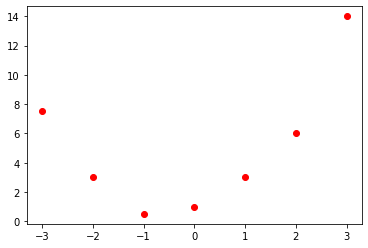

In [3]:
x = np.array([-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0])
y = np.array([7.5,3.0,0.5,1.0,3.0,6.0,14.0])

plt.scatter(x, y, color='red')
plt.show()

On créé la matrice $A$ qui a la forme suivante :
$$ A = \begin{bmatrix}
{x_1}^2 & x_1 & 1 \\
{x_2}^2 & x_2 & 1 \\
... \\
{x_n}^2 & x_n & 1
\end{bmatrix}$$

In [4]:
x_colonnes = x.reshape((-1, 1))

A = np.append(x_colonnes, x_colonnes**2, axis=1)
A = A[:,[1,0]]
ones = np.ones((len(x), 1))
A = np.append(A, ones, axis=1)
A

array([[ 9., -3.,  1.],
       [ 4., -2.,  1.],
       [ 1., -1.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  1.,  1.],
       [ 4.,  2.,  1.],
       [ 9.,  3.,  1.]])

On calcule ensuite $a$ et $b$ en utilisant la formule :

$$\begin{bmatrix}
a \\
b \\
c
\end{bmatrix} = (A^T A)^{-1} A^T y$$

In [5]:
At = A.T
pseudo_inv = np.linalg.inv(At.dot(A)).dot(At)
(a, b, c) = pseudo_inv.dot(y)

Regardons le résultat obtenu :

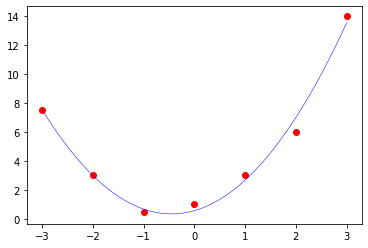

In [6]:
x_ = np.linspace(-3.0,3.0,num=100)
parabole = a*x_**2 + b*x_ + c
plt.scatter(x, y, color='red')
plt.plot(x_, parabole,color='blue',linewidth=0.5)
plt.show()

Pour calculer l'erreur quadratique moyenne, on utlise la formule :
$$ \epsilon = \frac{1}{n} \sum_{i=1}^{n} (a x^2_i + bx + c - y_i)^2 $$

In [7]:
epsilon = ((a*x**2 + b*x + c - y)**2).mean()    # Calcule la variance (erreur quadratique moyenne)
math.sqrt(epsilon)                              # Calcule l'écart type

0.46838846602157136